In [1]:
import pymc as pm
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import arviz as az
import pytensor
import pytensor.tensor as pt
import scipy.stats as st
import numpy as np

random_seed =  730612
np.random.seed(random_seed)
az.style.use('arviz-darkgrid')

data = pd.read_csv('creditcard_2023.csv', index_col = 0).sample(n = 100_000, random_state = random_seed)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
87173,0.486889,-1.295390,1.218147,-0.580435,-0.380234,0.693035,0.166256,-0.122517,0.693120,0.623353,...,0.046499,0.518068,-0.355780,1.057103,0.265613,-0.344790,-0.210745,0.129853,21704.02,0
312471,0.174620,-0.041697,-0.704024,0.267004,-0.090477,0.271177,-0.412403,0.116025,-0.150330,-0.768598,...,0.278033,0.764494,-0.199694,-2.463125,0.225973,0.205704,0.832096,0.960662,15663.69,1
174557,1.524583,-0.643920,-0.028402,-0.473037,0.335328,0.543114,0.358422,-0.153369,1.167318,0.388271,...,-0.228860,-1.016143,0.165091,-0.721069,-0.879128,0.314264,-0.293666,-0.083725,2935.12,0
94297,1.001070,-0.470120,0.734029,-0.329556,0.091513,0.421405,0.344175,-0.131818,0.782546,0.585527,...,-0.129563,-0.032318,-0.158463,0.152628,0.900298,0.954376,-0.263234,-0.109839,5628.28,0
261518,1.508335,-1.345750,-0.063697,-1.458386,0.064678,1.170360,0.148260,-0.096020,-0.090305,1.346805,...,-0.057620,0.656504,-0.192726,-2.459731,-0.025806,0.497061,-0.224498,-0.240166,13030.19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363617,-1.171595,0.450723,-1.113134,0.991643,-0.727082,-1.158848,-1.028059,0.553367,-1.317878,-1.257680,...,0.177069,-0.241332,-0.161152,-0.679468,0.171717,1.416208,1.602342,-0.290943,2634.44,1
25927,0.987095,-0.388537,0.543715,-0.424489,0.227628,0.408247,0.373723,-0.114117,0.473205,0.547131,...,-0.202229,-0.705056,0.098944,-0.645417,0.110364,0.307511,-0.258397,-0.072783,11207.45,0
299361,0.772858,-0.391915,0.274441,0.246834,0.700580,1.617288,0.166105,-0.229061,0.508650,0.924465,...,-0.232030,0.672847,-0.010757,-1.826127,-0.171692,0.440168,-0.253154,-0.090228,1733.04,1


In [3]:
X = data.iloc[:, 0:-1]
X["Amount"] = (X["Amount"] - X["Amount"].mean())/X["Amount"].std() # Seems like amount is the only one not standardized
y = data["Class"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)

In [4]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
id,,,,,,,,,,,,,,,,,,,,,
496512,0.444181,0.341156,-0.599238,0.847452,0.353503,-0.170590,-0.045518,-0.264172,-0.699530,-0.255989,...,0.512082,-0.103140,0.446553,-0.047472,0.308874,-0.045016,0.334261,0.308505,0.370278,-1.517441
193776,-0.310295,0.102561,-0.163314,-0.596324,2.049093,2.151687,0.490193,0.251252,-0.213566,0.197843,...,-0.157547,-0.098580,-0.150296,-0.581398,1.287489,2.049931,-0.358514,-0.255329,-0.232712,0.649982
464103,-0.259537,0.032897,-0.188538,0.347259,1.493894,-1.159566,-0.617632,-0.417348,-0.129467,-0.291643,...,0.210945,-0.277888,-0.285544,-3.670420,1.197505,-1.633136,-1.087208,0.697852,0.878011,1.716897
458710,-1.495422,1.518355,-1.503656,0.761389,-1.509055,-1.805033,-1.180958,1.843378,-0.607656,-0.868995,...,0.673097,0.257025,-0.850866,-0.259052,-0.022491,0.907404,-0.620008,1.279331,0.428285,0.716427
233325,1.716544,-0.550757,0.137602,-0.313422,0.262769,0.457529,0.398675,-0.169794,1.276195,0.526833,...,-0.318629,-0.252397,-0.639455,0.265813,1.387490,-0.237023,0.176403,-0.271507,-0.216626,-0.519589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363115,-1.165336,0.498267,-1.147823,0.995661,-0.770705,-1.293665,-0.982024,0.720022,-1.370237,-1.259806,...,0.328423,0.263805,-0.414765,-0.054788,-0.633651,0.372626,1.813509,1.650232,-0.577483,-1.523306
160302,1.981670,-0.972366,0.253996,-1.446222,-0.231254,-0.062957,0.106266,-0.216983,-0.121604,1.424599,...,-0.498231,-0.150285,0.143776,0.210233,0.146972,-0.494785,-0.424439,-0.204124,-0.191785,0.313885
444307,0.135500,-0.502644,0.102812,-0.208608,-0.045059,0.602109,1.573542,-0.262293,0.708900,0.170593,...,0.179138,-0.109519,-0.253615,-0.103158,-0.525741,0.350740,-1.069819,-0.193895,-0.179347,0.811915


# Logistic Regression using all Features

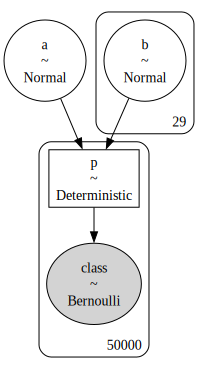

In [5]:
with pm.Model() as model1:
    
    Y = y_train
    x_m1 =  X_train
    
    k = len(X_train.columns)
    
    alpha = pm.Normal('a', mu=0, sigma=10)
    
    betas = pm.Normal('b', mu=0, sigma=10, shape=k) 
        
    theta = alpha + pm.math.dot(x_m1, betas)
    
    p = pm.Deterministic('p', pm.invlogit(theta))

    y_pred = pm.Bernoulli('class', p=p, observed=Y)
    
g1 = pm.model_to_graphviz(model1)

g1.render("logistic_regression_full", format="png", cleanup=True)
g1

In [6]:
with model1:
    trace1 = pm.sample(random_seed = random_seed, nuts_sampler='blackjax', return_inferencedata = True,
            idata_kwargs = {'log_likelihood': True})


Compiling...
Compilation time =  0:00:04.791728
Sampling...
Sampling time =  0:00:05.370121
Transforming variables...
Transformation time =  0:07:25.182234
Computing Log Likelihood...
Log Likelihood time =  0:00:09.966014


C:\Users\andre\anaconda3\envs\pymc_env\Lib\site-packages\arviz\plots\traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (30), generating only 20 plots
  warnings.warn(


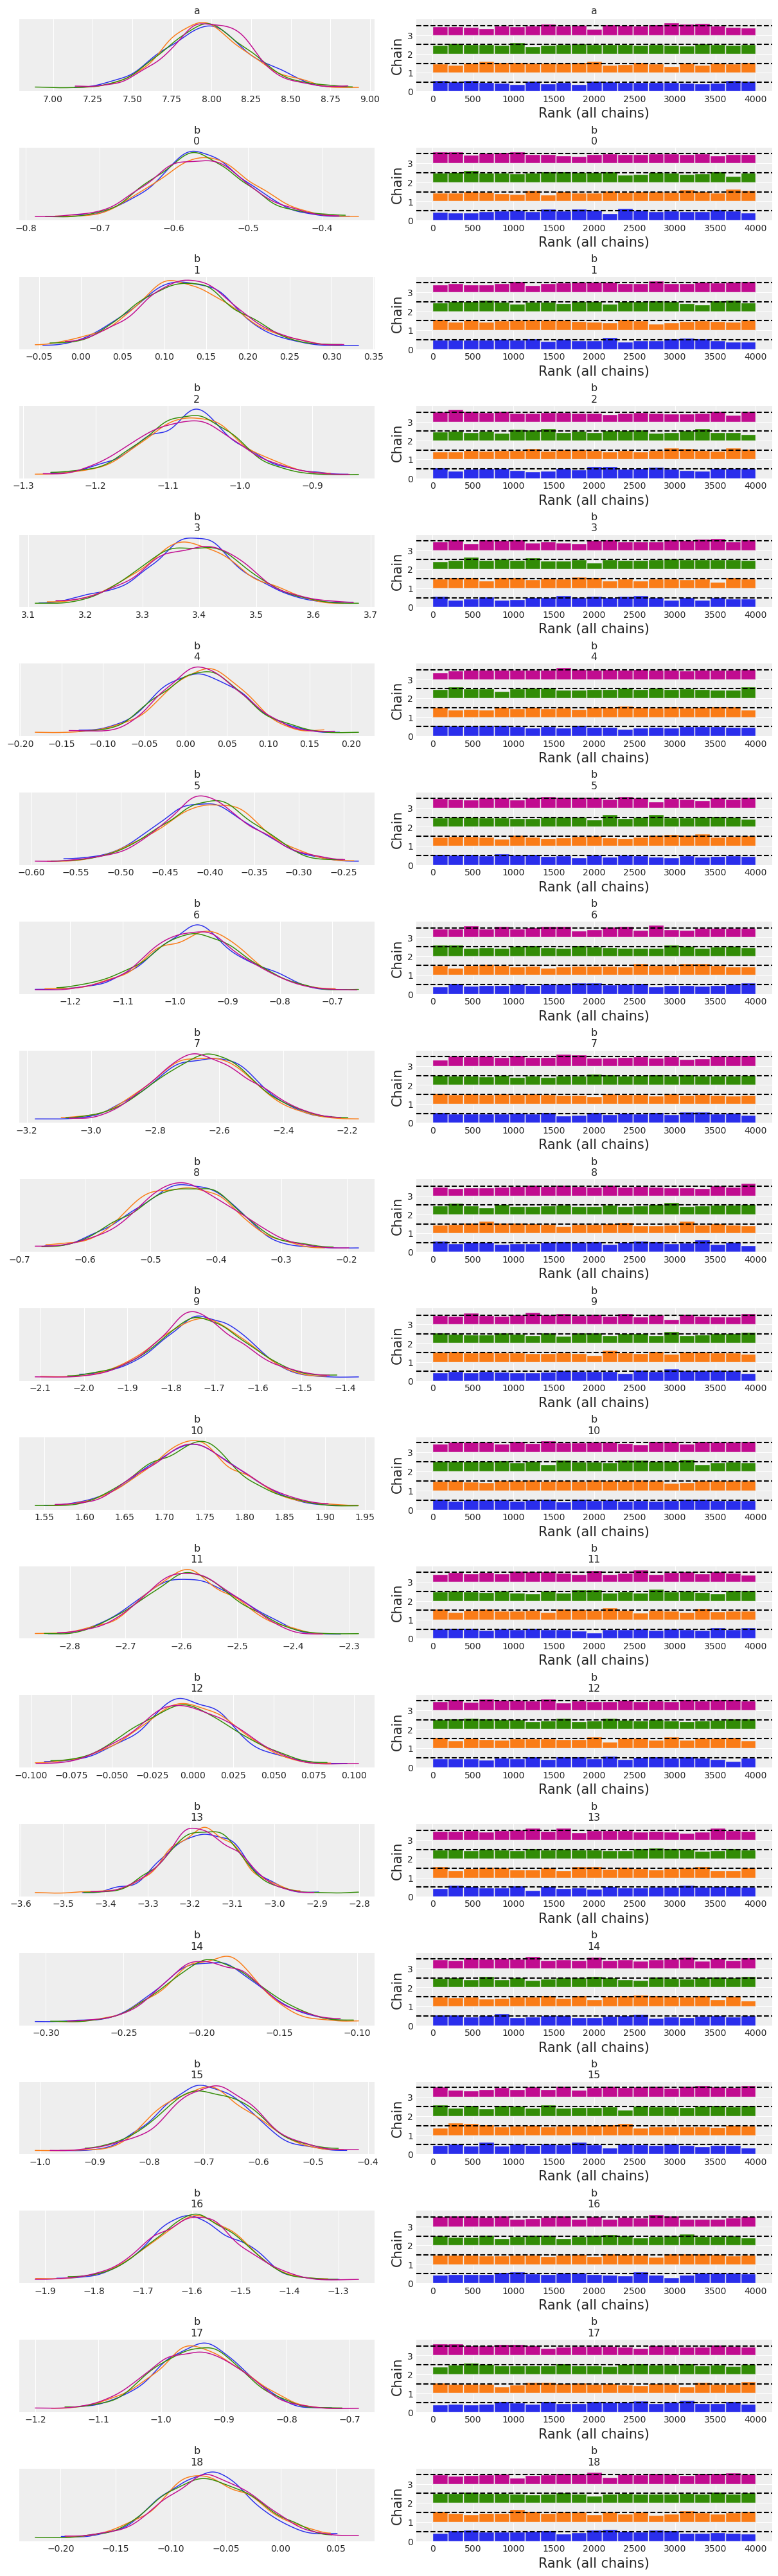

In [7]:
az.plot_trace(trace1, kind = 'rank_bars', compact = False, var_names = ['a', 'b'])
fig = plt.gcf() # to get the current figure...
fig.savefig("trace_full.png") # and save it directly

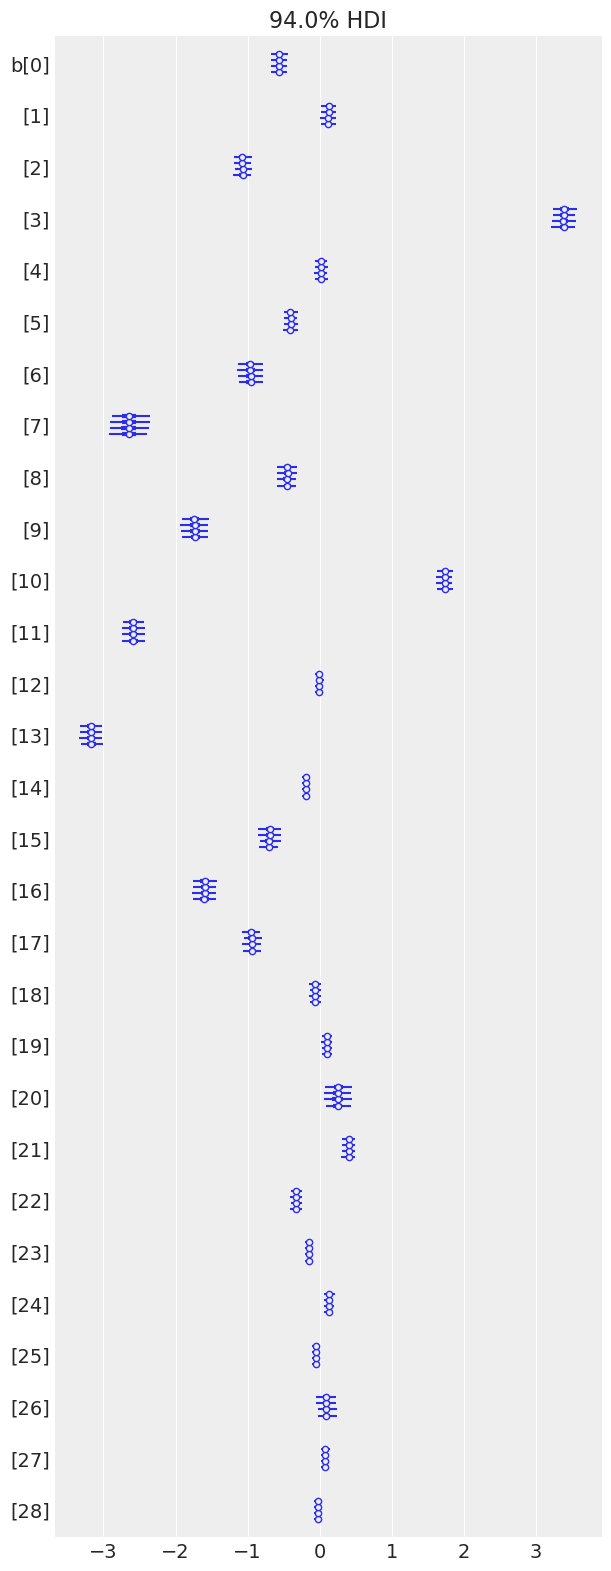

In [8]:
az.plot_forest(trace1, var_names = ['b'])
fig = plt.gcf() # to get the current figure...
fig.savefig("estimate_full.png") # and save it directly

In [9]:
m1_pp = pm.sample_posterior_predictive(trace1, 
                                          model = model1, random_seed = random_seed)

Sampling: [class]


Sampling: [a, b, class]


<Axes: xlabel='class / class'>

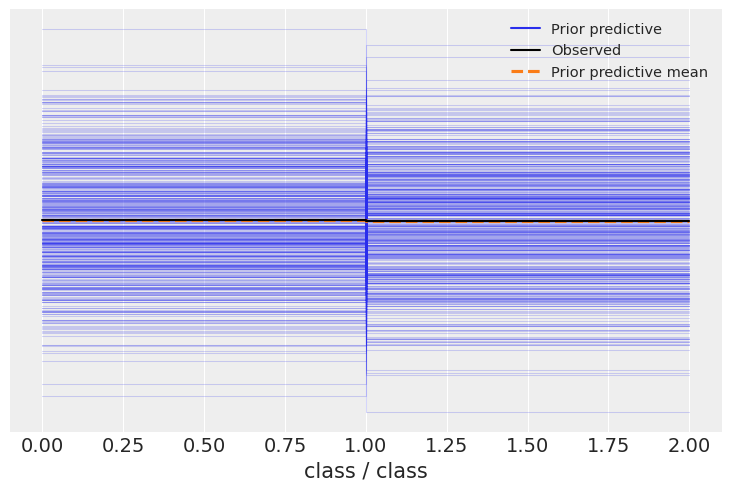

In [ ]:
prior_predictive_m1 = pm.sample_prior_predictive(samples = 500, model = model1, random_seed = random_seed)
az.plot_ppc(prior_predictive_m1, group = 'prior')

<Axes: title={'center': 'class / class'}>

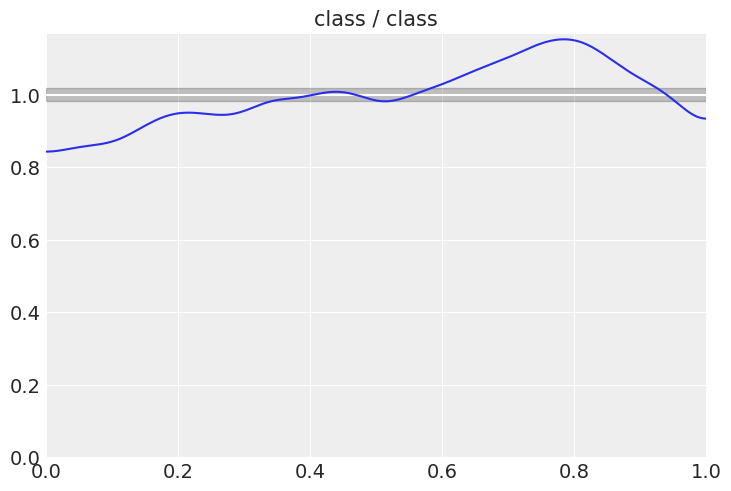

In [11]:
az.plot_bpv(m1_pp)


<Axes: xlabel='class / class'>

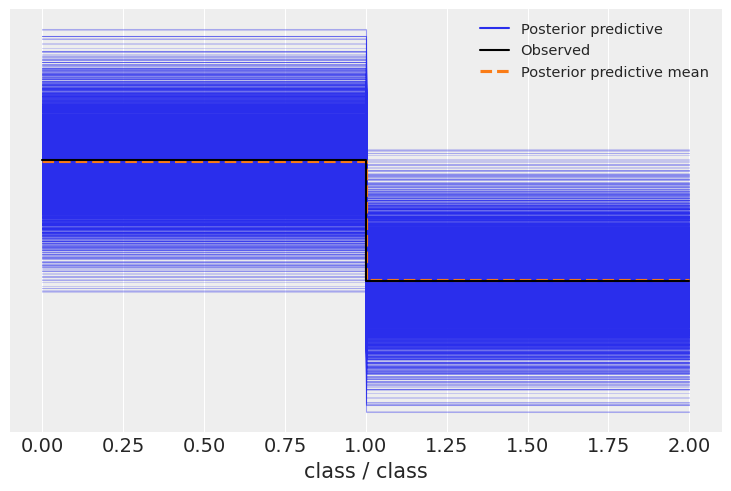

In [12]:
az.plot_ppc(m1_pp)


# Logistic Regression using Correlation as Feature Selection 

In [38]:
correlations = X_train.corrwith(y_train).to_dict()

features = []
for k,v in correlations.items():
    if abs(v)>0.5:
        print(f"{k} : {v:.2f}")
        features.append(k)

V1 : -0.50
V3 : -0.68
V4 : 0.73
V7 : -0.52
V9 : -0.58
V10 : -0.67
V11 : 0.73
V12 : -0.77
V14 : -0.81
V16 : -0.57


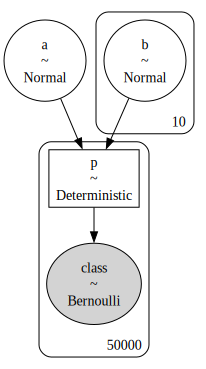

In [14]:
with pm.Model() as model2:
    Y = y_train
    x_m1 = X_train[features]
    
    k = len(features)
    
    alpha = pm.Normal('a', mu=0, sigma=10)
    
    betas = pm.Normal('b', mu=0, sigma=10, shape=k)
    
    theta = alpha + pm.math.dot(x_m1, betas)
    
    p = pm.Deterministic('p', pm.invlogit(theta))

    y_pred = pm.Bernoulli('class', p=p, observed=Y)
    
g2 = pm.model_to_graphviz(model2)

g2.render("logistic_regression_correlation_selection", format="png", cleanup=True)
g2

In [15]:
with model2:
    trace2 = pm.sample(random_seed = random_seed, nuts_sampler='blackjax', return_inferencedata = True,
            idata_kwargs = {'log_likelihood': True})


Compiling...
Compilation time =  0:00:04.520775
Sampling...
Sampling time =  0:00:05.008210
Transforming variables...
Transformation time =  0:02:00.905837
Computing Log Likelihood...
Log Likelihood time =  0:00:08.696621


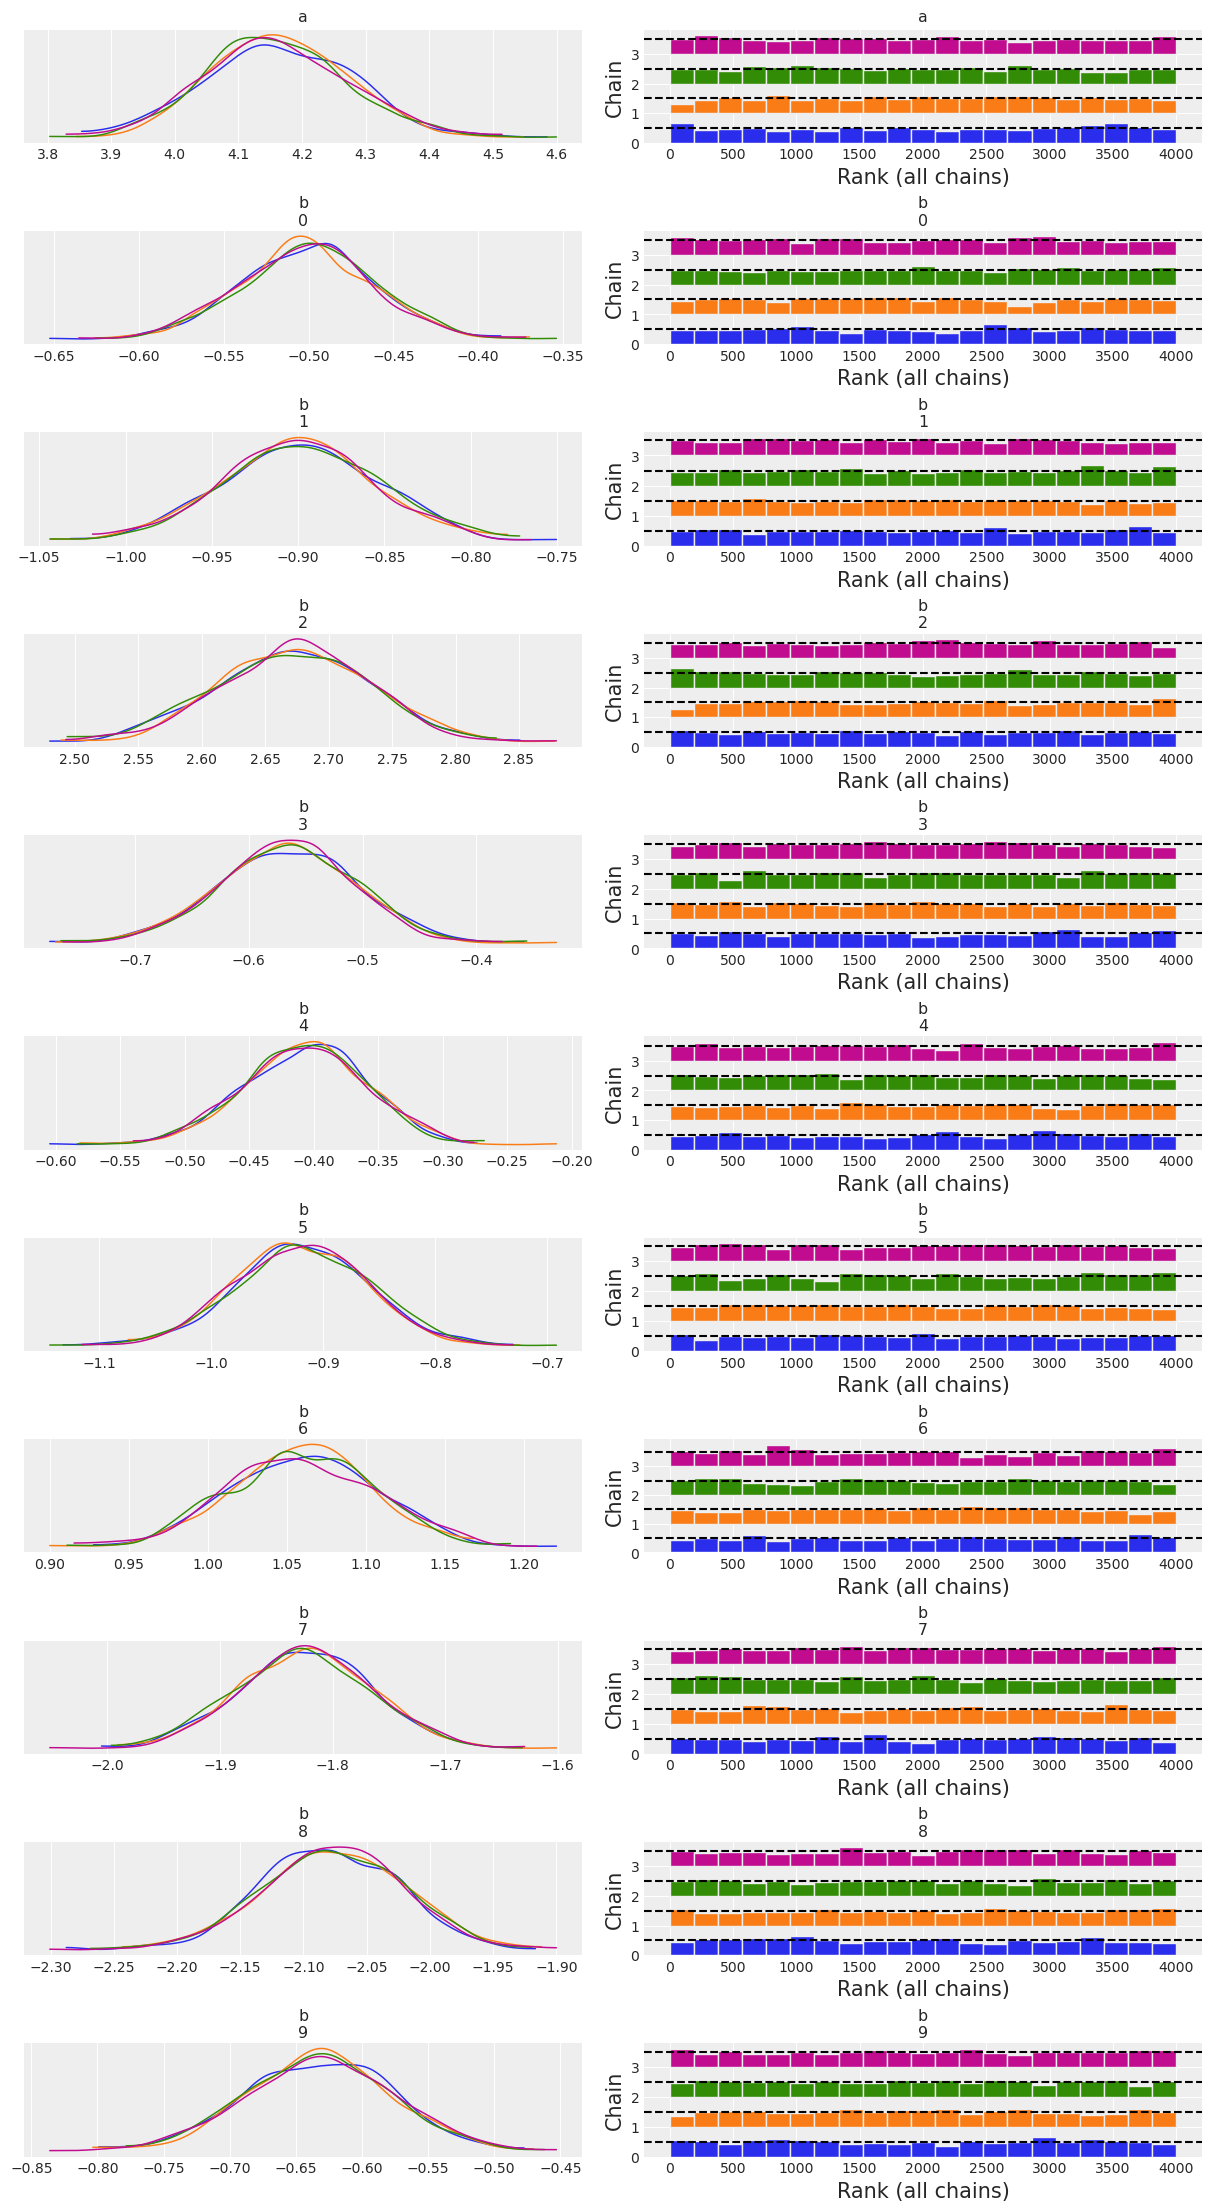

In [16]:
az.plot_trace(trace2, kind = 'rank_bars', compact = False, var_names = ['a', 'b'])
fig = plt.gcf() # to get the current figure...
fig.savefig("trace_cor.png") # and save it directly

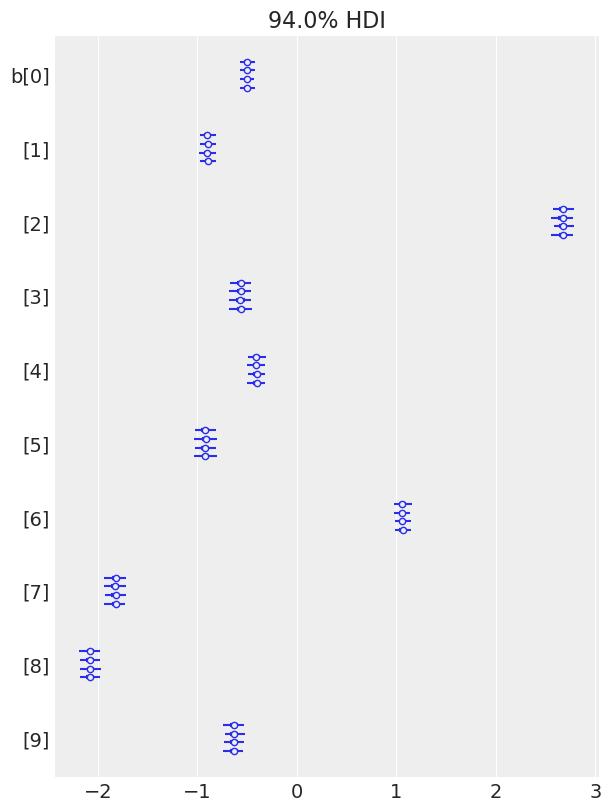

In [17]:
az.plot_forest(trace2, var_names = ['b'])
fig = plt.gcf() # to get the current figure...
fig.savefig("estimate_cor.png") # and save it directly

In [18]:
m2_pp = pm.sample_posterior_predictive(trace2, 
                                          model = model2, random_seed = random_seed)

Sampling: [class]


Sampling: [a, b, class]


<Axes: xlabel='class / class'>

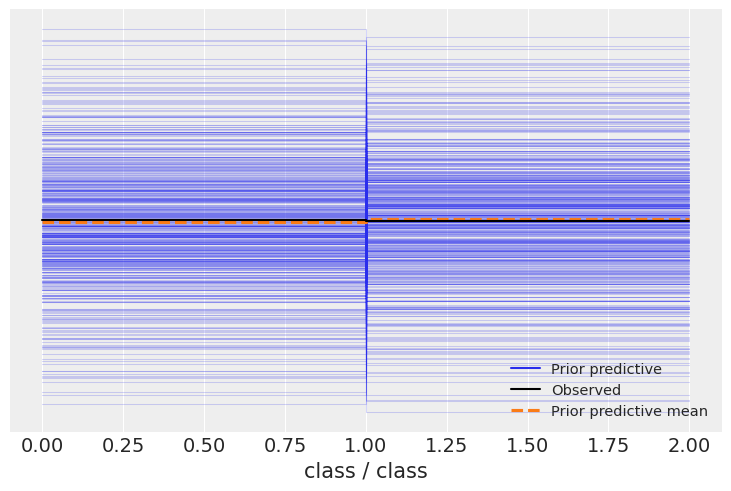

In [34]:
prior_predictive_m2 = pm.sample_prior_predictive(samples = 500, model = model2, random_seed = random_seed)
az.plot_ppc(prior_predictive_m2, group = 'prior')

<Axes: title={'center': 'class / class'}>

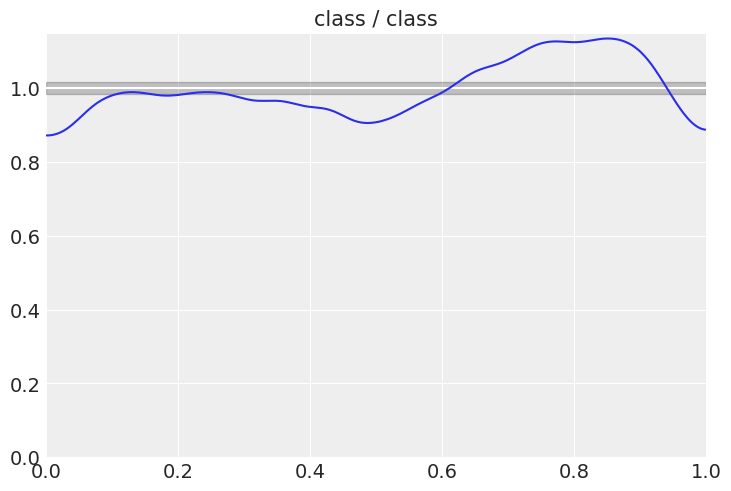

In [20]:
az.plot_bpv(m2_pp)


<Axes: xlabel='class / class'>

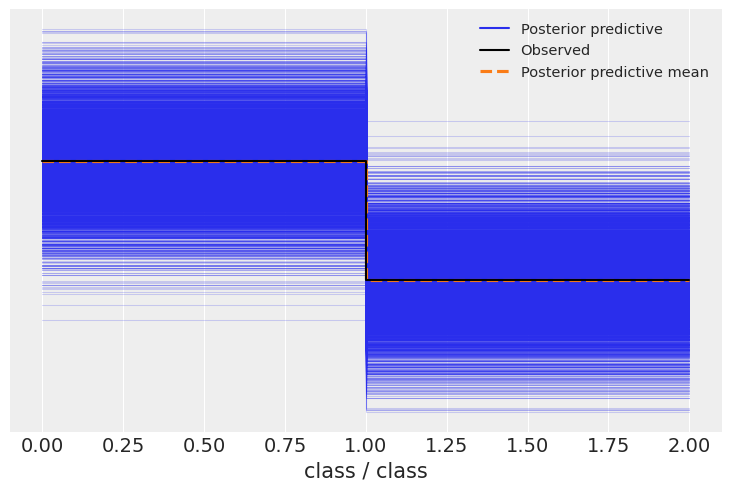

In [21]:
az.plot_ppc(m2_pp)


# Logistic Regression using Feature Importance as Feature Selection

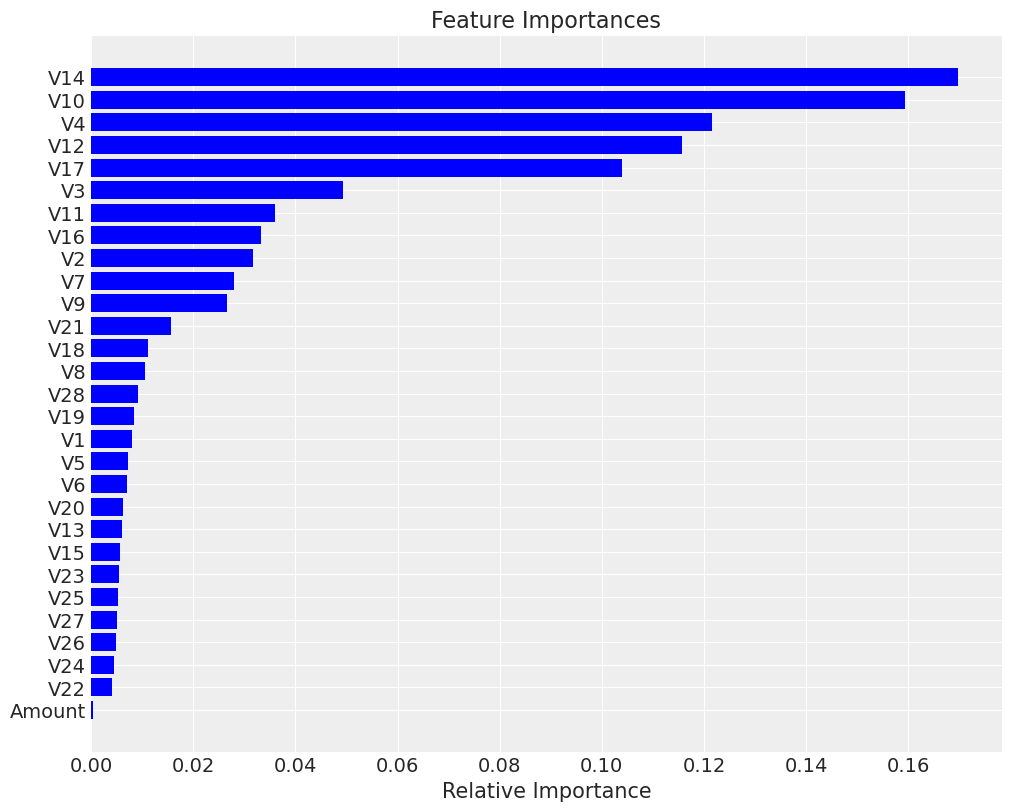

In [22]:
from sklearn.ensemble import RandomForestClassifier

x_rf = data.drop('Class', axis=1) 
y_rf = data["Class"]

rf = RandomForestClassifier(random_state=random_seed)
rf.fit(x_rf, y_rf)

importances = rf.feature_importances_

features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We'll choose a cutoff of 0.04 to select our features. 

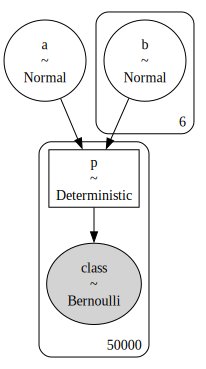

In [23]:
rf_features = ["V14", "V10", "V4", "V12", "V17", "V3"]

with pm.Model() as model3:
    Y = y_train
    x_m1 = X_train[rf_features]
    
    k = len(rf_features)
    
    alpha = pm.Normal('a', mu=0, sigma=10)
    
    betas = pm.Normal('b', mu=0, sigma=10, shape=k)
    
    theta = alpha + pm.math.dot(x_m1, betas)
    
    p = pm.Deterministic('p', pm.invlogit(theta))

    y_pred = pm.Bernoulli('class', p=p, observed=Y)
    
g3 = pm.model_to_graphviz(model3)

g3.render("logistic_regression_rf_selection", format="png", cleanup=True)
g3


In [24]:
with model3:
    trace3 = pm.sample(random_seed = random_seed, nuts_sampler='blackjax', return_inferencedata = True,
            idata_kwargs = {'log_likelihood': True})


Compiling...
Compilation time =  0:00:04.287761
Sampling...
Sampling time =  0:00:04.813037
Transforming variables...
Transformation time =  0:01:21.086375
Computing Log Likelihood...
Log Likelihood time =  0:00:08.090851


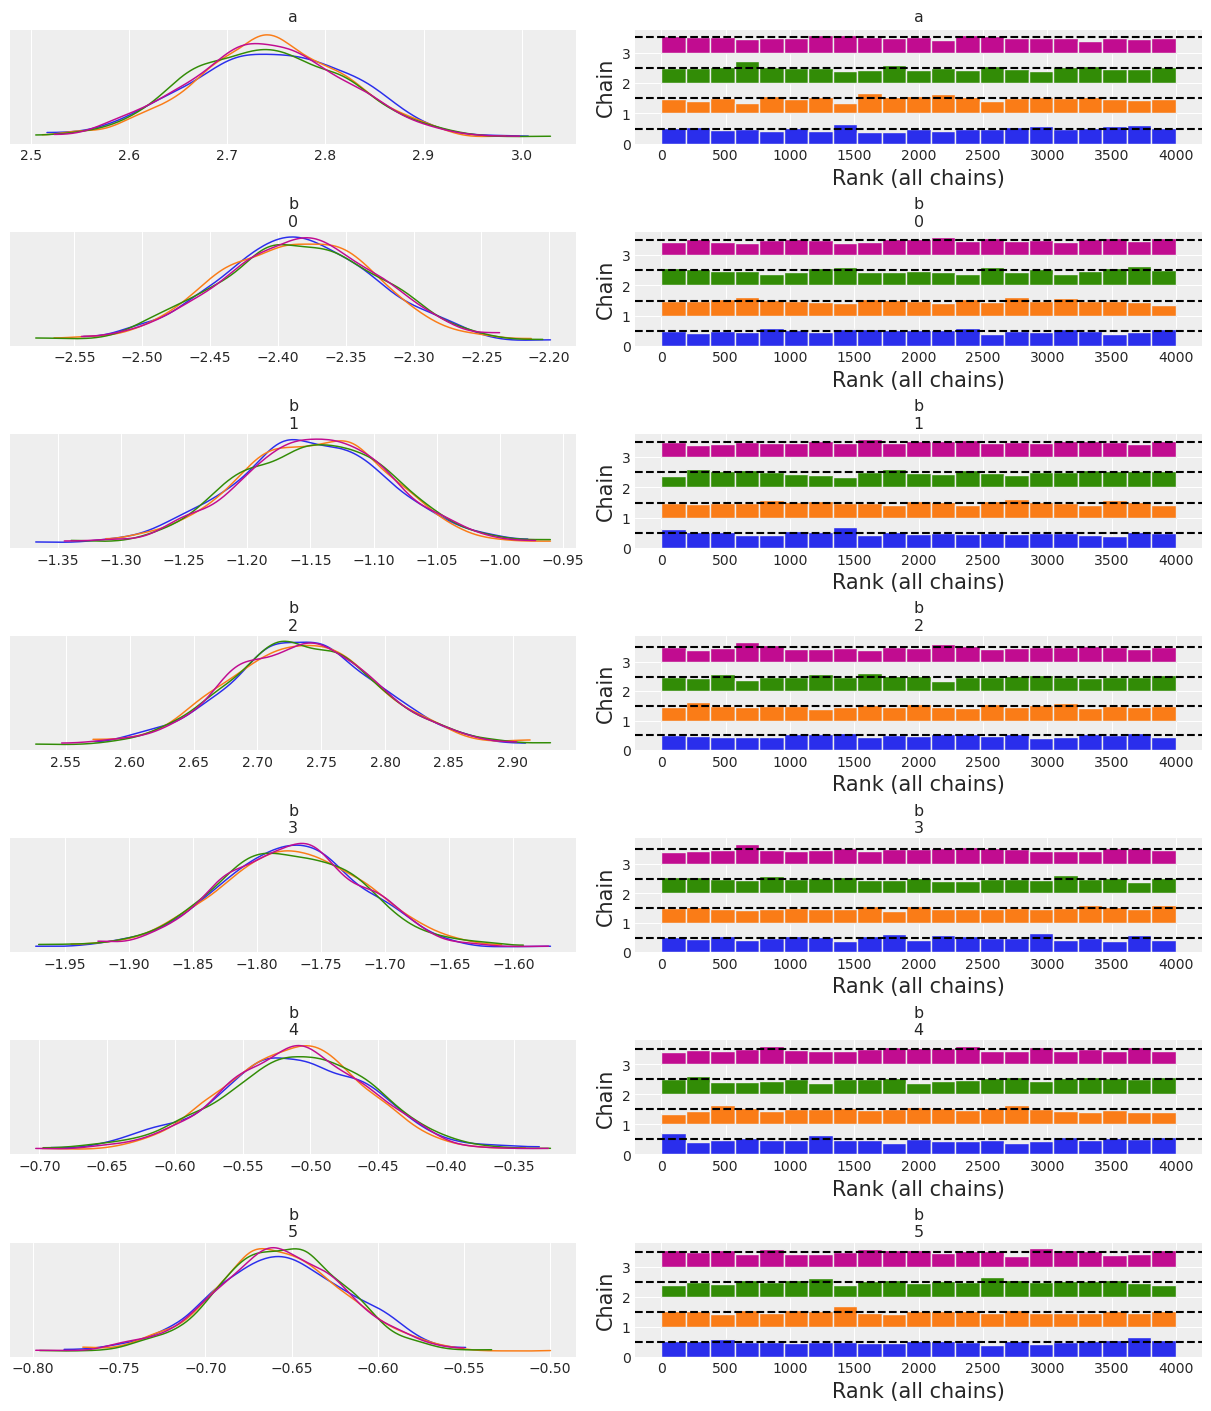

In [25]:
az.plot_trace(trace3, kind = 'rank_bars', compact = False, var_names = ['a', 'b'])
fig = plt.gcf() # to get the current figure...
fig.savefig("trace_rf.png") # and save it directly

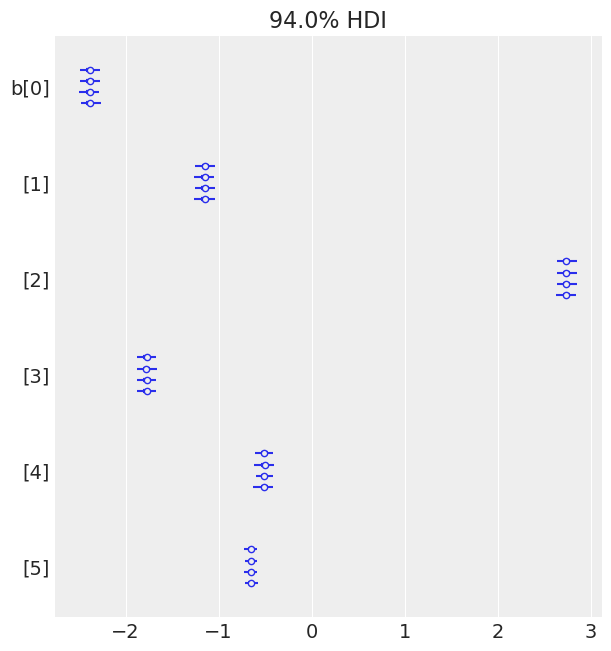

In [26]:
az.plot_forest(trace3, var_names = ['b'])
fig = plt.gcf() # to get the current figure...
fig.savefig("estimate_rf.png") # and save it directly

Sampling: [a, b, class]


<Axes: xlabel='class / class'>

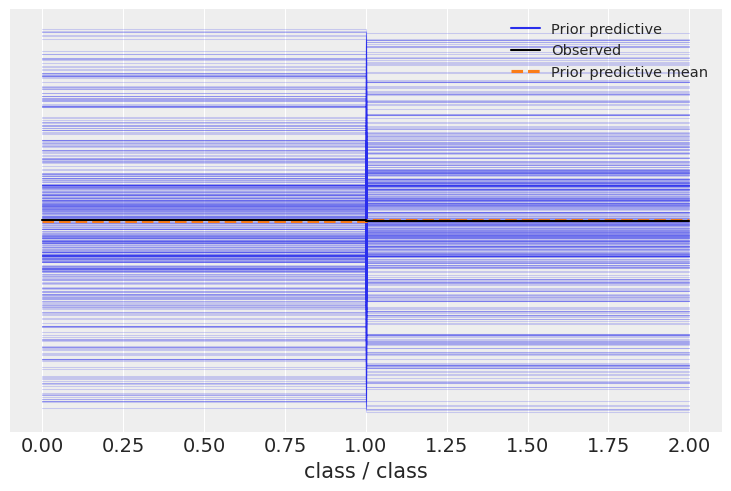

In [33]:
prior_predictive_m3 = pm.sample_prior_predictive(samples = 500, model = model3, random_seed = random_seed)
az.plot_ppc(prior_predictive_m3, group = 'prior')

In [27]:
m3_pp = pm.sample_posterior_predictive(trace3, 
                                          model = model3, random_seed = random_seed)

Sampling: [class]


<Axes: title={'center': 'class / class'}>

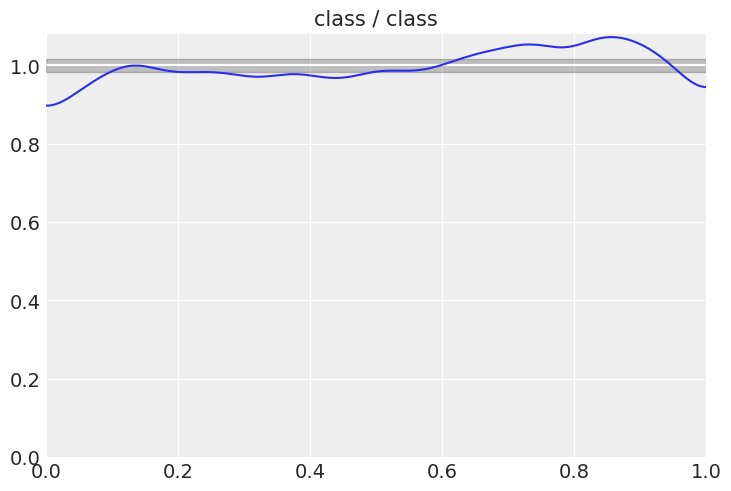

In [28]:
az.plot_bpv(m3_pp)


<Axes: xlabel='class / class'>

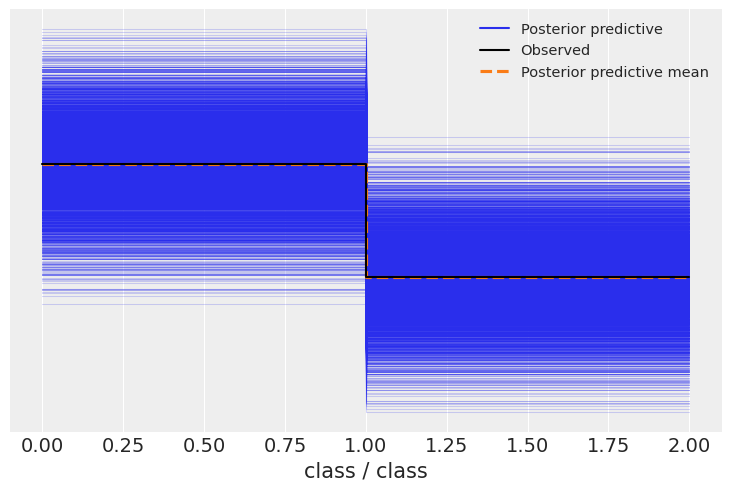

In [29]:
az.plot_ppc(m3_pp)


# Model Comparison

In [51]:
model_dict = {
    "full":trace1,
    "correlation":trace2,
    "rf_selection":trace3}

comp = az.compare(model_dict, ic = "waic")
comp

TypeError: Encountered error in ELPD computation of compare.

In [37]:
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [39]:
from sklearn.metrics import roc_auc_score, accuracy_score

names = ["full", "correlation", "rf_selection"] 
variables = [list(X.columns), features, rf_features]
traces = [trace1, trace2, trace3]

invlogit = lambda x: 1/(1 + np.exp(-x)) # inverse logistic function to help with calculating

for i in range(0,len(traces)):
    matrix = variables[i]
    y_hat = invlogit(traces[i]['posterior']['a'].mean(axis = 0).mean(axis = 0).values + np.dot(X_train[variables[i]], traces[i]['posterior']['b'].mean(axis = 0).mean(axis = 0).values))
    
    print(f"{names[i]} AUCROC on training data:",roc_auc_score(y_train, y_hat))

full AUCROC on training data: 0.9933642402505286
correlation AUCROC on training data: 0.9915946098631069
rf_selection AUCROC on training data: 0.9893090297811802


In [40]:
threshold = 0.5

for i in range(0,len(traces)):
    matrix = variables[i]
    y_hat = invlogit(traces[i]['posterior']['a'].mean(axis = 0).mean(axis = 0).values + np.dot(X_train[variables[i]], traces[i]['posterior']['b'].mean(axis = 0).mean(axis = 0).values))
    y_hat = (y_hat >= threshold).astype("int")

    print(f"{names[i]} accuracy on training data:",accuracy_score(y_train, y_hat))

full accuracy on training data: 0.9653
correlation accuracy on training data: 0.959
rf_selection accuracy on training data: 0.9559


In [41]:
# Retrain and test data 

with pm.Model() as model1_t:
    
    Y = pm.MutableData("y", y_train)
    x_m1 = pm.MutableData("X", X_train) # training data

    k = len(X_train.columns)
    
    alpha = pm.Normal('a', mu=0, sigma=10)
    
    betas = pm.Normal('b', mu=0, sigma=10, shape=k) 
        
    theta = alpha + pm.math.dot(x_m1, betas)
    
    p = pm.Deterministic('p', pm.invlogit(theta))

    y_pred = pm.Bernoulli('class', p=p, observed=Y)
    
    trace1 = pm.sample(random_seed = random_seed, cores = 8, nuts_sampler = "blackjax")

Compiling...
Compilation time =  0:00:11.040035
Sampling...
Sampling time =  0:00:05.403348
Transforming variables...
Transformation time =  0:11:01.262600


In [44]:
with model1_t:
    # Test data
    pm.set_data({"X": X_test})
    #Predict outcomes & probabilities
    model1_pp = pm.sample_posterior_predictive(
    trace1,
    var_names = ["p"],
    return_inferencedata=True,
    predictions=True,
    extend_inferencedata=True,
    random_seed = random_seed)

Sampling: []


In [42]:
with pm.Model() as model2_t:
    
    Y = pm.MutableData("y", y_train)
    x_m1 = pm.MutableData("X", X_train[features]) # training data

    k = len(X_train[features].columns)
    
    alpha = pm.Normal('a', mu=0, sigma=10)
    
    betas = pm.Normal('b', mu=0, sigma=10, shape=k) 
        
    theta = alpha + pm.math.dot(x_m1, betas)
    
    p = pm.Deterministic('p', pm.invlogit(theta))

    y_pred = pm.Bernoulli('class', p=p, observed=Y)
    
    trace2 = pm.sample(random_seed = random_seed, cores = 8, nuts_sampler = "blackjax")

Compiling...
Compilation time =  0:00:10.364260
Sampling...
Sampling time =  0:00:04.737375
Transforming variables...
Transformation time =  0:03:24.468936


In [45]:
with model2_t:
    # Test data
    pm.set_data({"X": X_test[features]})
    #Predict outcomes & probabilities
    model2_pp = pm.sample_posterior_predictive(
    trace2,
    var_names = ["p"],
    return_inferencedata=True,
    predictions=True,
    extend_inferencedata=True,
    random_seed = random_seed)

Sampling: []


In [43]:
with pm.Model() as model3_t:
    
    Y = pm.MutableData("y", y_train)
    x_m1 = pm.MutableData("X", X_train[rf_features]) # training data

    k = len(X_train[rf_features].columns)
    
    alpha = pm.Normal('a', mu=0, sigma=10)
    
    betas = pm.Normal('b', mu=0, sigma=10, shape=k) 
        
    theta = alpha + pm.math.dot(x_m1, betas)
    
    p = pm.Deterministic('p', pm.invlogit(theta))

    y_pred = pm.Bernoulli('class', p=p, observed=Y)
    
    trace3 = pm.sample(random_seed = random_seed, cores = 8, nuts_sampler = "blackjax")

Compiling...
Compilation time =  0:00:10.038537
Sampling...
Sampling time =  0:00:04.602788
Transforming variables...
Transformation time =  0:02:18.966134


In [46]:
with model3_t:
    # Test data
    pm.set_data({"X": X_test[rf_features]})
    #Predict outcomes & probabilities
    model3_pp = pm.sample_posterior_predictive(
    trace3,
    var_names = ["p"],
    return_inferencedata=True,
    predictions=True,
    extend_inferencedata=True,
    random_seed = random_seed)

Sampling: []


# Final Predictions for each individual model 

In [48]:
names = ["full", "correlation", "rf_selection"] 

traces = [model1_pp, model2_pp, model3_pp]
for i in range(0,len(traces)):
    point_estimates = traces[i].predictions["p"].mean(dim=["chain", "draw"])
    print(f"{names[i]} AUCROC on testing data:",roc_auc_score(y_test, point_estimates))

full AUCROC on testing data: 0.9936133554821768
correlation AUCROC on testing data: 0.9916899053122142
rf_selection AUCROC on testing data: 0.9893016782312893


In [49]:
from sklearn.metrics import confusion_matrix

threshold = 0.5

for i in range(0,len(traces)):
    point_estimates = traces[i].predictions["p"].mean(dim=["chain", "draw"])
    y_hat = (point_estimates >= threshold).astype("int")
    cm = confusion_matrix(y_test, y_hat)
    tn, fp, fn, tp = cm.ravel()
    print(f"{names[i]} tnr:",tn/(fp + tn), f"{names[i]} fpr:", fp/(fp + tn), f"{names[i]} fnr:", fn/(tp + fn), f"{names[i]} tpr:", tp/(tp + fn))
    print(f"{names[i]} accuracy on testing data:",accuracy_score(y_test, y_hat))

full tnr: 0.9810665068903535 full fpr: 0.018933493109646496 full fnr: 0.0496294812737833 full tpr: 0.9503705187262167
full accuracy on testing data: 0.96574
correlation tnr: 0.9813461154383862 correlation fpr: 0.01865388456161374 correlation fnr: 0.06160624874824755 correlation tpr: 0.9383937512517525
correlation accuracy on testing data: 0.9599
rf_selection tnr: 0.9778709806271221 rf_selection fpr: 0.02212901937287797 rf_selection fnr: 0.06657320248347687 rf_selection tpr: 0.9334267975165231
rf_selection accuracy on testing data: 0.95568


# Bayesian Model Averaging 

In [191]:
# Using training data set 
ppc_w = az.stats.weight_predictions(
    idatas=[m1_pp,m2_pp, m3_pp],
    weights=comp.weight
)

In [219]:
estimated_probabilities = np.mean(np.array(ppc_w['posterior_predictive']['class']), axis = 1) 

print(f"Bayesian model averaging AUCROC on training data:",roc_auc_score(y_train,estimated_probabilities))

Bayesian model averaging AUCROC on training data: 0.993325355881656


In [220]:
y_hat = (estimated_probabilities >= threshold).astype("int")

print(f"Bayesian model averaging accuracy on training data:",accuracy_score(y_train, y_hat))

Bayesian model averaging accuracy on training data: 0.9652


In [53]:
# The code to generate the out-of-sample predictions we ran gives the probability, we can use the weights to generate the final predictions 
estimates = 0.97*model1_pp.predictions["p"].mean(dim=["chain", "draw"]) + 0*model2_pp.predictions["p"].mean(dim=["chain", "draw"]) + 0.03*model3_pp.predictions["p"].mean(dim=["chain", "draw"])

In [247]:
print(f"Bayesian model averaging AUCROC on testing data:",roc_auc_score(y_test,estimates))

Bayesian model averaging AUCROC on training data: 0.9935621921818967


In [54]:
y_hat = (estimates >= threshold).astype("int")
cm = confusion_matrix(y_test, y_hat)
tn, fp, fn, tp = cm.ravel()
print((tn/(fp + tn), fp/(fp + tn), fn/(tp + fn), tp/(tp + fn)))   
print(f"Bayesian model averaging accuracy on testing data:",accuracy_score(y_test, y_hat))

(0.9811064509686439, 0.0188935490313561, 0.05007009813739235, 0.9499299018626076)
Bayesian model averaging accuracy on testing data: 0.96554
